In [2]:
import numpy as np
import pandas as pd

In [3]:
encoding = 'latin1'
df = pd.read_csv('spam.csv', encoding=encoding)

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4440,ham,I'm going 2 orchard now laready me reaching so...,NaN,NaN,NaN
3825,ham,"Goodmorning,my grandfather expired..so am on l...",NaN,NaN,NaN
423,spam,URGENT! Your Mobile number has been awarded wi...,NaN,NaN,NaN
5058,spam,Free video camera phones with Half Price line ...,NaN,NaN,NaN
3184,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# 1.DATA CLEANING
#2. EDA 
#3. TEXT PREPROCESSING
#4. Model building 
#5. Evaluation 
#6. Improvement 
#7. Website
#6. Deploy


# 1. Data_Cleaning


In [6]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [9]:
df.sample(5)

,v1,v2
2091,ham,Then get some cash together and I'll text jason
2358,ham,I'll talk to the others and probably just come...
1998,ham,"Well, I have to leave for my class babe ... Yo..."
3644,spam,wamma get laid?want real doggin locations sent...
2322,ham,Should I be stalking u?


In [10]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace = True )
df.sample(5)

,target,text
2643,ham,Hi! You just spoke to MANEESHA V. We'd like to...
2927,ham,Anything...
3263,ham,I will send them to your email. Do you mind &...
4150,ham,ÌÏ comin to fetch us oredi...
2949,ham,Where are you ? You said you would be here whe...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
#remove duplicates 
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

#  2. EDA [Exploratory Data Analysis]

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

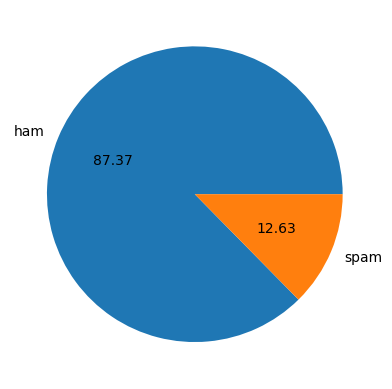

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels= ['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
#Data is imbalanced

In [23]:
!pip install nltk

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ISHAN
[nltk_data]     PESHKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [27]:
df['num_characters'] = df['text'].apply(len)

C:\Users\ISHAN PESHKAR\AppData\Local\Temp\ipykernel_18048\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ISHAN PESHKAR\AppData\Local\Temp\ipykernel_18048\3149482763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [30]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [31]:
#hi

In [32]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ISHAN PESHKAR\AppData\Local\Temp\ipykernel_18048\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,5169.000000,5169.000000
mean,78.977945,1.965564
std,58.236293,1.448541
min,2.000000,1.000000
25%,36.000000,1.000000
50%,60.000000,1.000000
75%,117.000000,2.000000
max,910.000000,38.000000


In [36]:
#Ham 
df[df['target']==0][['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,4516.000000,4516.000000
mean,70.459256,1.820195
std,56.358207,1.383657
min,2.000000,1.000000
25%,34.000000,1.000000
50%,52.000000,1.000000
75%,90.000000,2.000000
max,910.000000,38.000000


In [37]:
#Spam 
df[df['target']== 1][['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,653.000000,653.000000
mean,137.891271,2.970904
std,30.137753,1.488425
min,13.000000,1.000000
25%,132.000000,2.000000
50%,149.000000,3.000000
75%,157.000000,4.000000
max,224.000000,9.000000


In [38]:
import seaborn as sns

ValueError: Invalid RGBA argument: 'r ed'

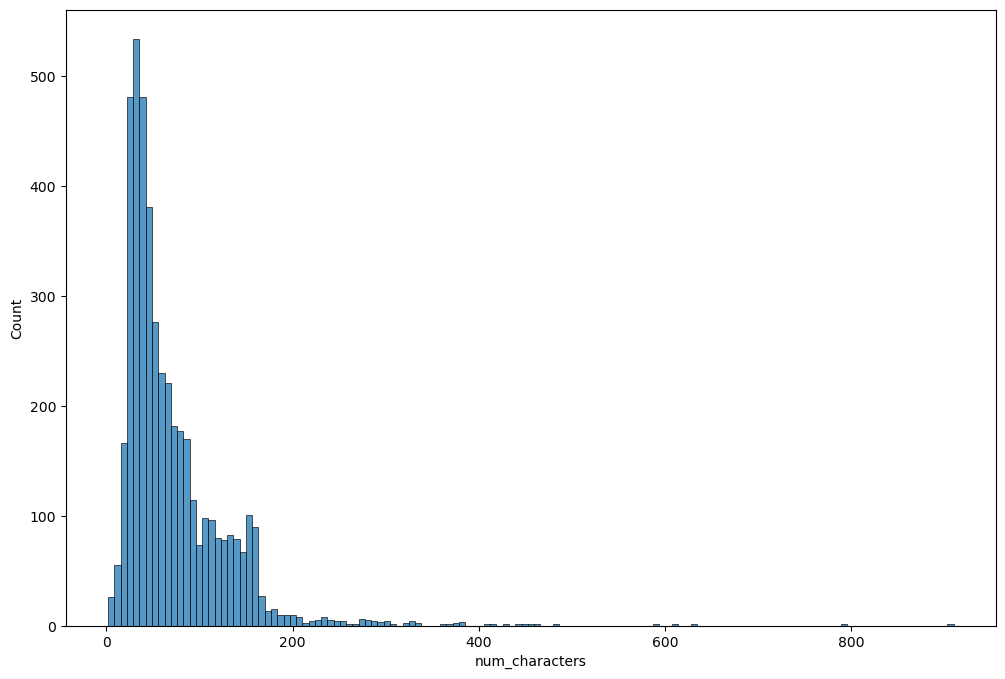

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'r ed')

<Axes: xlabel='num_words', ylabel='Count'>

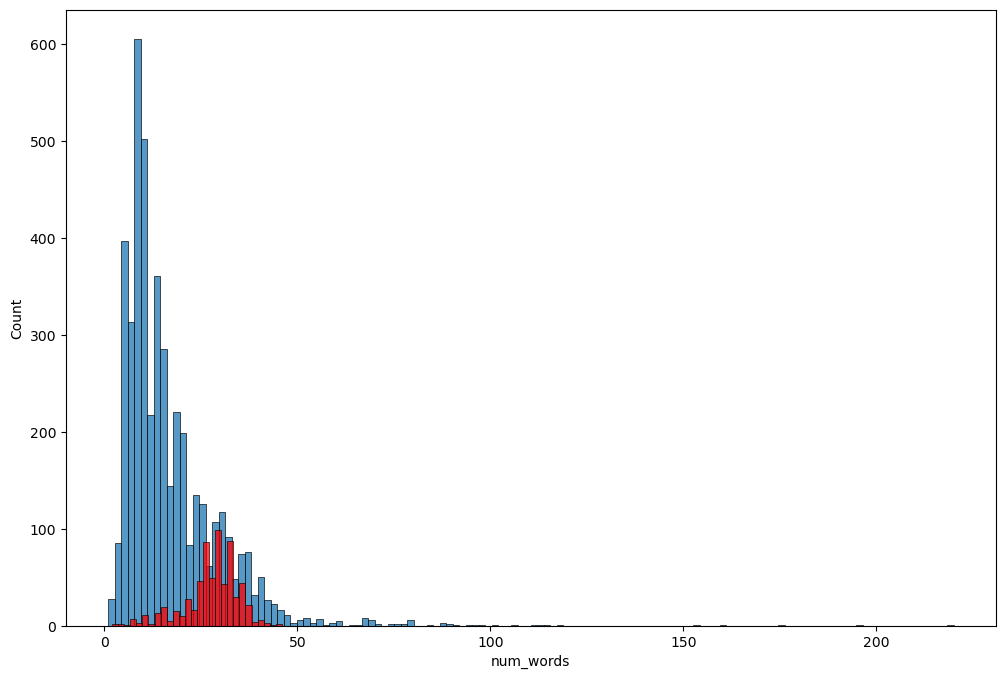

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'],color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

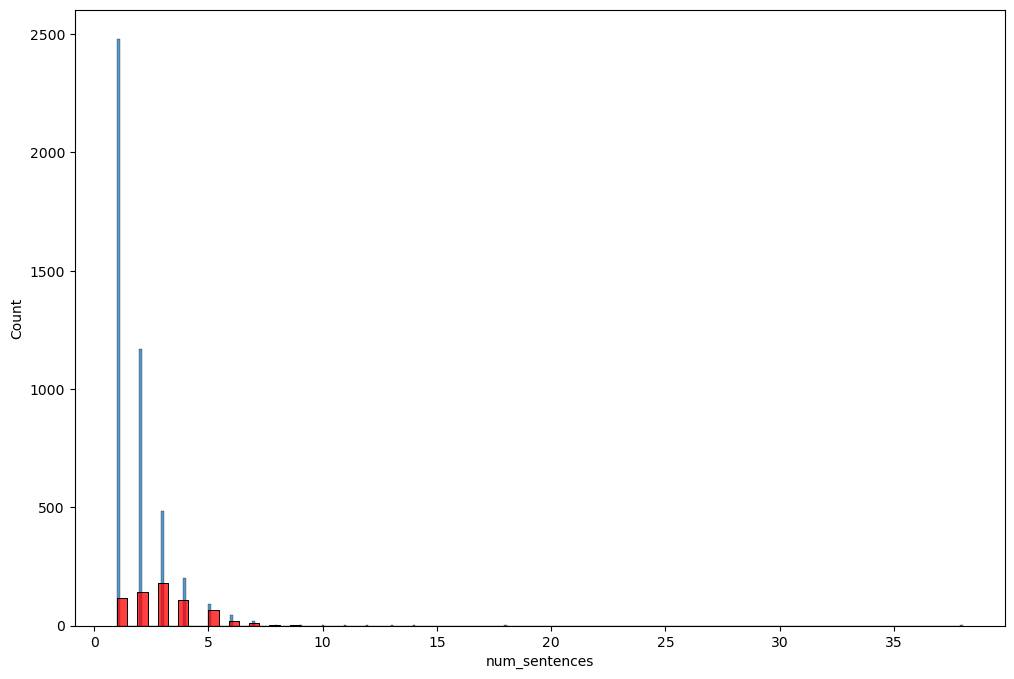

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']== 1]['num_sentences'],color = 'red')

C:\Users\ISHAN PESHKAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


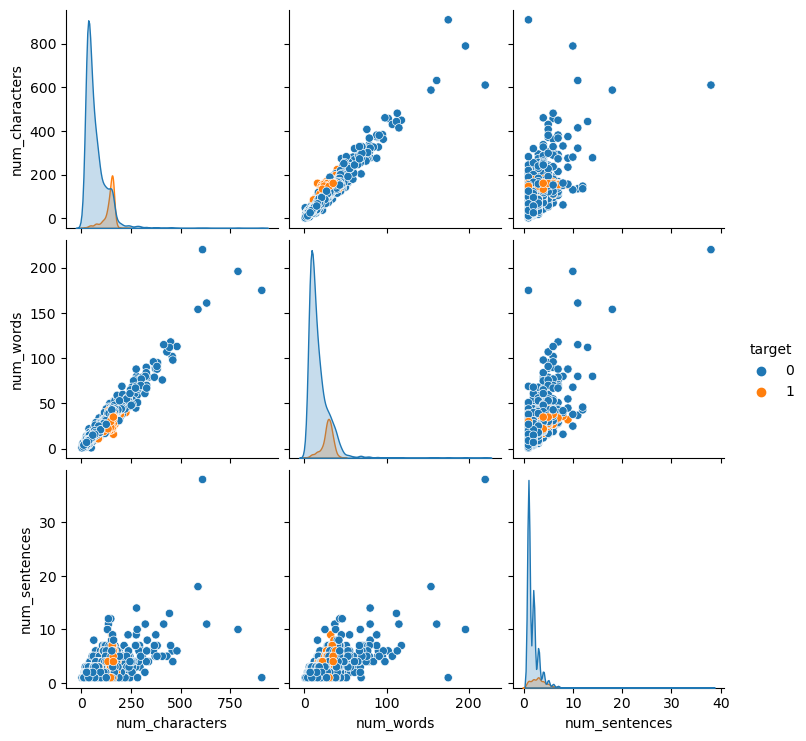

In [42]:
sns.pairplot(df,hue='target')

In [43]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# 3.Data Preprocessing 
#- Lower case
#- Tokenization
#- Removing special characters
#- Removing stop words and punctuation
#- Stemming

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    return text
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [45]:
#import nltk
#nltk.download('stopwords')

In [46]:
#from nltk.corpus import stopwords

In [47]:
#stopwords.words('english')

In [48]:
#import string
#string.punctuation

In [49]:
#transform_text("Did you like my presentation on ML")
transform_text('I loved the lectures on Machine Learning .How about you?')

['i',
 'loved',
 'the',
 'lectures',
 'on',
 'machine',
 'learning',
 '.how',
 'about',
 'you',
 '?']

In [50]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')
#ps.stem('loving')

'danc'

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\ISHAN PESHKAR\AppData\Local\Temp\ipykernel_18048\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, ,, crazy, .., avail..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [54]:
pip install wordcloud

In [55]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].astype(str).str.cat(sep = " "))

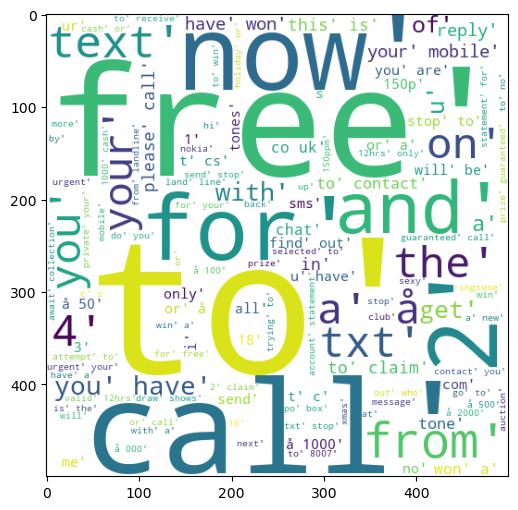

In [57]:
plt.figure(figsize =(12,6))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].astype(str).str.cat(sep = " "))

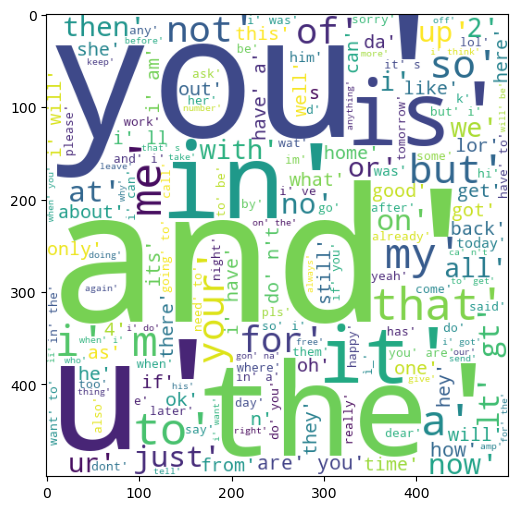

In [59]:
plt.figure(figsize =(12,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, ,, crazy, .., avail..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [61]:
spam_corpus = []
for msg_list in df[df['target'] == 1]['transformed_text'].tolist():
    for msg in msg_list:
        for word in msg.split():
            spam_corpus.append(word)
        
        #print(msg)

In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, ,, crazy, .., avail..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


In [63]:
len(spam_corpus)

17983

<function matplotlib.pyplot.show(close=None, block=None)>

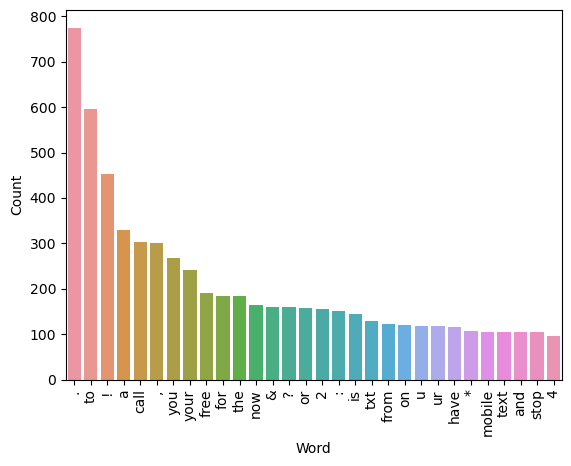

In [64]:
from collections import Counter
word_counts = Counter(spam_corpus)

# Create a DataFrame with the most common 30 words and their counts
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using seaborn
sns.barplot(x='Word', y='Count', data=common_words_df)

plt.xticks(rotation='vertical')
plt.show

In [65]:
ham_corpus = []
for msg_list in df[df['target'] == 0]['transformed_text'].tolist():
    for msg in msg_list:
        for word in msg.split():
            ham_corpus.append(word)

In [66]:
len(ham_corpus)

77261

<function matplotlib.pyplot.show(close=None, block=None)>

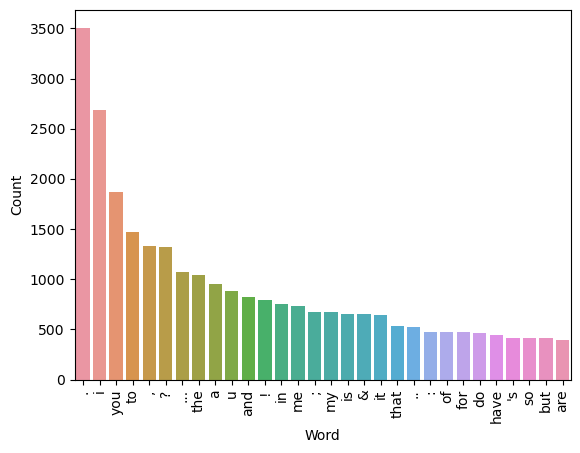

In [67]:
from collections import Counter
word_counts = Counter(ham_corpus)

# Create a DataFrame with the most common 30 words and their counts
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using seaborn
sns.barplot(x='Word', y='Count', data=common_words_df)

plt.xticks(rotation='vertical')
plt.show

In [68]:
# Text Vectorization
# using Bag of Words
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, ,, crazy, .., avail..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."


# 4. Model Building


In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
df['transformed_text_str'] = df['transformed_text'].apply(lambda x: ' '.join(x))

C:\Users\ISHAN PESHKAR\AppData\Local\Temp\ipykernel_18048\652318334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text_str'] = df['transformed_text'].apply(lambda x: ' '.join(x))


In [70]:
#X = cv.fit_transform(df['transformed_text_str']).toarray()
X = tfidf.fit_transform(df['transformed_text_str']).toarray()

In [71]:
X.shape

(5169, 8660)

In [72]:
y = df['target'].values

In [73]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9090909090909091
[[821  75]
 [ 19 119]]
0.6134020618556701


In [79]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9506769825918762
[[896   0]
 [ 51  87]]
1.0


In [80]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[893   3]
 [ 20 118]]
0.9752066115702479


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    #'xgb':xgb
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [85]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.975)

In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.8974854932301741
Precision -  1.0
For  NB
Accuracy -  0.9506769825918762
Precision -  1.0
For  DT
Accuracy -  0.9429400386847195
Precision -  0.8691588785046729
For  LR
Accuracy -  0.9545454545454546
Precision -  0.941747572815534
For  RF
Accuracy -  0.9729206963249516
Precision -  1.0
For  AdaBoost
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065
For  BgC
Accuracy -  0.9642166344294004
Precision -  0.8976377952755905
For  ETC
Accuracy -  0.9787234042553191
Precision -  1.0
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9245283018867925


In [109]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [89]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.897485,1.000000
2,NB,0.950677,1.000000
5,RF,0.972921,1.000000
8,ETC,0.978723,1.000000
0,SVC,0.976789,0.975000
6,AdaBoost,0.974855,0.951613
4,LR,0.954545,0.941748
9,GBDT,0.953578,0.924528
7,BgC,0.964217,0.897638
3,DT,0.942940,0.869159


In [90]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [91]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.897485
1,NB,Accuracy,0.950677
2,RF,Accuracy,0.972921
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.976789
5,AdaBoost,Accuracy,0.974855
6,LR,Accuracy,0.954545
7,GBDT,Accuracy,0.953578
8,BgC,Accuracy,0.964217
9,DT,Accuracy,0.942940


C:\Users\ISHAN PESHKAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


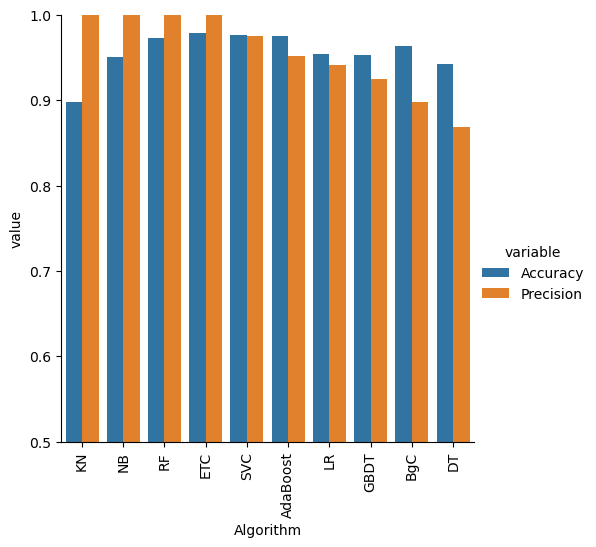

In [92]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [93]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [94]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [96]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [97]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [99]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.897485,1.000000,0.897485,1.000000,0.897485,1.000000,0.897485,1.000000
1,NB,0.950677,1.000000,0.950677,1.000000,0.950677,1.000000,0.950677,1.000000
2,RF,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
3,ETC,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000,0.978723,1.000000
4,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
5,AdaBoost,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613
6,LR,0.954545,0.941748,0.954545,0.941748,0.954545,0.941748,0.954545,0.941748
7,GBDT,0.953578,0.924528,0.953578,0.924528,0.953578,0.924528,0.953578,0.924528
8,BgC,0.964217,0.897638,0.964217,0.897638,0.964217,0.897638,0.964217,0.897638
9,DT,0.942940,0.869159,0.942940,0.869159,0.942940,0.869159,0.942940,0.869159


In [100]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [101]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [102]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [103]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 1.0


In [104]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [105]:
from sklearn.ensemble import StackingClassifier

In [106]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [107]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.948905109489051


In [108]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))